In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.6 MB/s eta 0:00:00


In [3]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [4]:
img = cv.imread("/content/drive/MyDrive/Celebrity Faces Dataset/Leonardo DiCaprio/001_08194468.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

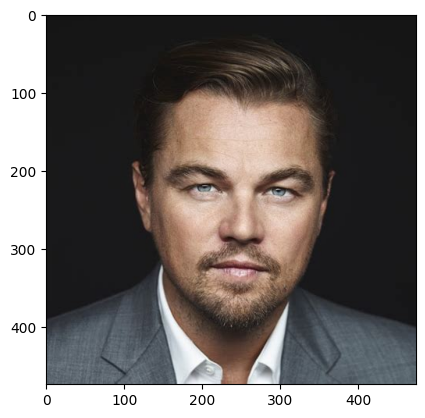

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB


In [6]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

In [7]:
results

[{'box': [142, 109, 208, 274],
  'confidence': 0.98037189245224,
  'keypoints': {'nose': [252, 279],
   'mouth_right': [286, 326],
   'right_eye': [298, 225],
   'left_eye': [202, 220],
   'mouth_left': [205, 322]}}]

In [8]:
x,y,w,h = results[0]['box']

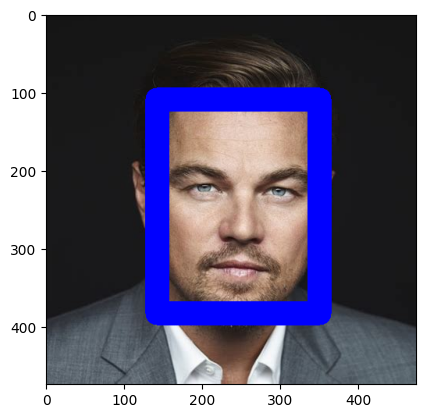

In [9]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

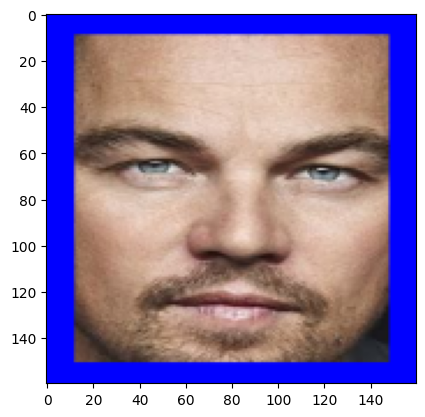

In [10]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
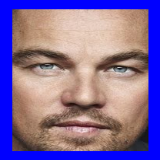

In [11]:
my_face

In [12]:
# Automate the preprocessing


In [13]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
faceloading = FACELOADING("/content/drive/MyDrive/Celebrity Faces Dataset")
X, Y = faceloading.load_classes()

Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 98
Loaded successfully: 99
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 198
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 100
Loaded successfully: 99


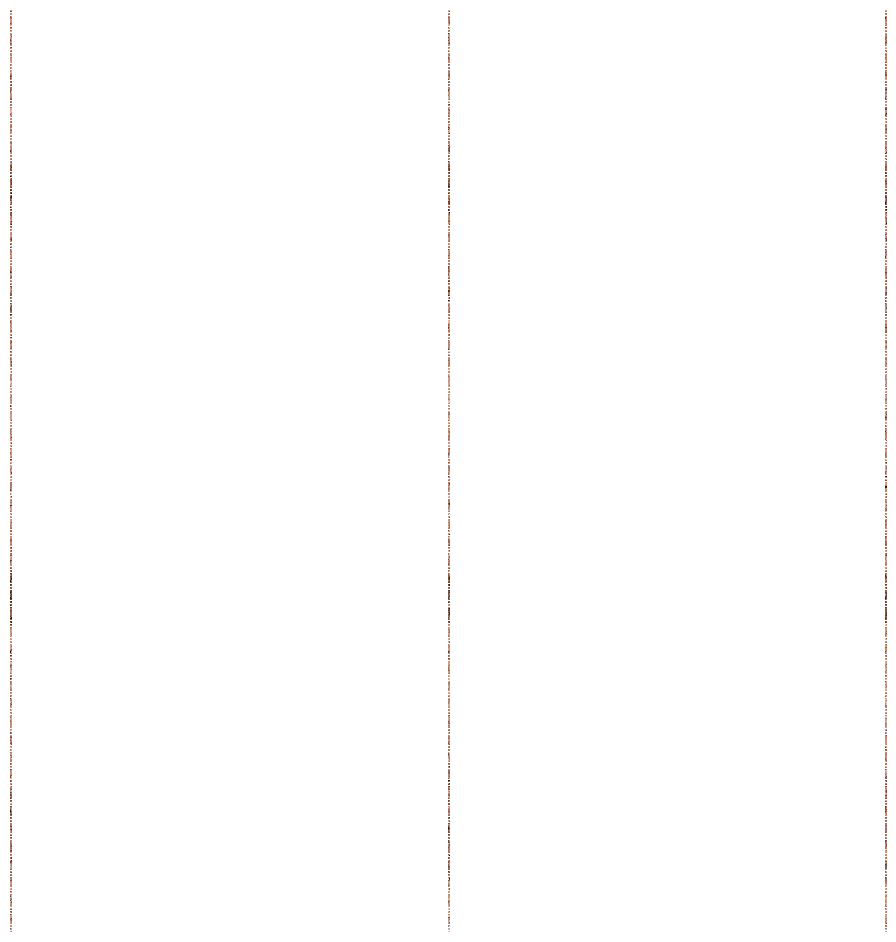

In [15]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [16]:
# FaceNet part

In [17]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=9f2d7fe9f42239a7145b7ffbb3efeb5d0cfd0a2a5a1fa07ebb236bdf8f6aa476
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [18]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [19]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [20]:
np.savez_compressed('faces_embeddings_done_4classes1.npz', EMBEDDED_X, Y)
#faces_embeddings_done_4classes.npz

In [21]:
#SVM model

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [26]:
!pip install joblib
import joblib
joblib.dump(encoder, 'label_encoder_new_dataset.pkl')


['label_encoder_new_dataset.pkl']

Text(0, 0.5, '12')

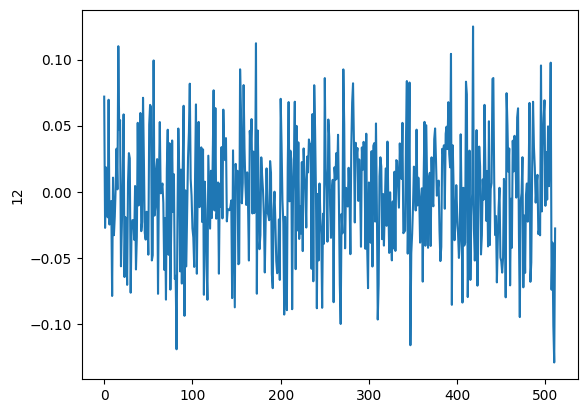

In [27]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [28]:
#break

In [29]:
Y

array([12, 12, 12, ...,  6,  6,  6])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [31]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [32]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

0.9947955390334573

In [34]:
accuracy_score(Y_test,ypreds_test)

0.9665924276169265

In [36]:
t_im = cv.imread("/content/drive/MyDrive/Celebrity Faces Dataset/Will Smith/001_beebcee2.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [37]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


In [38]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [39]:
ypreds


array([16])

In [40]:
encoder.inverse_transform(ypreds)

array(['Will Smith'], dtype='<U18')

In [41]:
import pickle
#save the model
with open('svm_model_1_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [43]:
import cv2 as cv
import numpy as np
import joblib
from keras_facenet import FaceNet

# Load pre-trained model, encoder, and embeddings
model = joblib.load('/content/svm_model_1_160x160.pkl')
encoder = joblib.load('/content/label_encoder_new_dataset.pkl')

# Load embeddings and labels if necessary (in case you need to check or do something with them)
data = np.load('/content/faces_embeddings_done_4classes1.npz')
EMBEDDED_X = data['arr_0']
Y = data['arr_1']

# Function to extract embeddings for a new image
def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D (160x160x3)
    face_img = np.expand_dims(face_img, axis=0)  # 4D (None, 160, 160, 3)
    embedder = FaceNet()  # Create an embedder object
    yhat = embedder.embeddings(face_img)
    return yhat[0]  # 512D embedding (1x1x512)

# Function to predict from an image path
def predict_from_image(image_path):
    # Load and process the image
    t_im = cv.imread(image_path)
    t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)

    # Detect the face using MTCNN (or any other face detection method)
    detector = MTCNN()
    faces = detector.detect_faces(t_im)

    if len(faces) > 0:
        # Get the bounding box of the first face detected
        x, y, w, h = faces[0]['box']
        x, y = abs(x), abs(y)
        t_im = t_im[y:y+h, x:x+w]

        # Resize the face to 160x160 as expected by the model
        t_im = cv.resize(t_im, (160, 160))

        # Get the embedding for the face
        test_im = get_embedding(t_im)
        test_im = [test_im]  # SVM expects 2D array

        # Predict using the SVM model
        ypreds = model.predict(test_im)

        # Inverse transform the prediction to get the label
        predicted_class = encoder.inverse_transform(ypreds)
        print(f"Predicted class: {predicted_class[0]}")
    else:
        print("No face detected!")

# Example usage
image_path = "/content/drive/MyDrive/Celebrity Faces Dataset/Will Smith/001_beebcee2.jpg"  # Replace with the image path you want to test
predict_from_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Will Smith
